<a href="https://www.kaggle.com/code/divyamuthukrishnan/eda-on-housing-supply?scriptVersionId=102382925" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px

import plotly.graph_objects as go
import numpy as np

import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-affordability-in-canada/Structural-dwellings-household-size.csv
/kaggle/input/housing-affordability-in-canada/HPI 1981-2022 by regions.csv
/kaggle/input/housing-affordability-in-canada/income-distribution-2012-2020.csv
/kaggle/input/housing-affordability-in-canada/HPI 1981-2022 federal and provincial.csv
/kaggle/input/housing-affordability-in-canada/population_dwellings_count.csv
/kaggle/input/housing-affordability-in-canada/Interest and mortgage rates 1951-2022.csv
/kaggle/input/housing-affordability-in-canada/population-by-region-1946-2022.csv
/kaggle/input/housing-affordability-in-canada/CPI-inflation-by-region-1914-202.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-price-rental.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-and-rental/housing-supply-and-rental/ottawa_section1_.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-and-rental/housing-supply-and-rental/saguenay_section1_.csv
/kaggle/input/housing-aff

In [2]:
housing_df = pd.read_csv('/kaggle/input/housing-affordability-in-canada/housing-supply-price-rental.csv')

## Data Insights

### Concepts and Definitions provided by CMHC

* A **“start”** for the purposes of the Starts and Completions Survey, is defined as the beginning of
construction work on a building, usually when the concrete has been poured for the whole of the
footing around the structure, or an equivalent stage where a basement will not be part of the structure.

* A __“completion”__ is defined as the stage at which all proposed construction work on the building has
been performed, although under some circumstances a building may be counted as completed where up
to 10 percent of the proposed work remains to be done.

* For multiple-dwelling structures, the definition of a Start or a Completion applies to the structure
rather than to the individual dwelling units therein.

* The number of units __“under construction”__ as at the end of the period shown, takes into account
certain adjustments which are necessary for various reasons. For example, after a start on a dwelling
has commenced construction may cease, or a structure when completed may contain more or fewer
dwelling units than were reported at start.

* A __dwelling__ is defined as being “absorbed” when a binding, non-conditional agreement is made to buy
the dwelling.
Only new self-contained dwelling units are enumerated in the Starts and Completions
Survey, such units being designed for non-transient and year-round occupancy.

* Seasonal dwellings, such as: summer cottages, hunting and ski cabins, trailers and boat houses; and
hostel accommodation, such as: hospitals, nursing homes, penal institutions, convents,
monasteries, military and industrial camps, and collective types of accommodation such as: hotels,
clubs, and lodging homes are excluded from all residential housing surveys.

* Mobile Homes are included in the surveys. A mobile home is a type of manufactured house that is
completely assembled in a factory, then moved to a foundation before it is occupied.

* Trailers or any other movable dwelling (the larger often referred to as a mobile home) with no
permanent foundation are excluded from the surveys.

* Market housing is defined as housing that is marketed to the general public for sale or rent.

* A “dwelling unit” is defined as a structurally separate set of living premises with a private entrance
either outside the building or from a common hall, lobby, vestibule or stairway inside the building. The
entrance must be one that can be used without passing through anyone else’s living quarters.

* Seasonally Adjusted at Annual Rate (SAAR) is the result of adjusting monthly or quarterly
statistics to provide an indication of the annual total which would be achieved if activity in all other
months or quarters were at the same level of performance relative to past seasonal patterns.




In [3]:
housing_df.head()

,Unnamed: 0,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,...,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,disposable_income_change,migration,region
0,0,1990.0,3297,2847,450,57,6,387,2274,2004.0,...,418,524,608,1105.421,67.300,0.219444,7.4,-2.669133,-5108,manitoba
1,1,1991.0,1950,1589,361,14,0,347,1438,1085.0,...,424,531,630,1109.604,67.025,-1.364064,8.6,-2.669133,-5108,manitoba
2,2,1992.0,2310,1683,627,64,10,553,1821,1383.0,...,434,545,644,1112.689,66.475,-1.351685,9.3,-0.326989,-5108,manitoba
3,3,1993.0,2425,1874,551,52,83,416,1702,1338.0,...,435,550,652,1117.618,66.850,0.766782,9.3,-0.453243,-2520,manitoba
4,4,1994.0,3197,2441,756,72,410,274,1664,1289.0,...,440,551,645,1123.230,66.750,0.774181,8.8,0.161821,-1996,manitoba


In [4]:
housing_df.tail()

,Unnamed: 0,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,...,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,disposable_income_change,migration,region
939,22,2012.0,896,449,447,12,91,344,896,552.0,...,850,1005,1230,165.914,64.3,1.639344,6.7,NaN,1239,kingston
940,23,2013.0,856,325,531,8,103,420,856,436.0,...,859,1054,1463,166.950,64.9,2.481390,6.3,NaN,978,kingston
941,24,2014.0,672,338,334,26,102,206,672,462.0,...,888,1070,1411,168.164,63.6,-1.452785,6.8,NaN,1185,kingston
942,25,2015.0,655,275,380,14,53,313,655,332.0,...,915,1096,1469,169.420,64.3,1.842752,6.6,NaN,1259,kingston
943,26,2016.0,412,300,112,4,93,15,412,397.0,...,942,1119,1798,171.372,63.5,0.844391,5.8,NaN,1990,kingston


In [5]:
housing_df.shape

(944, 38)

Drop last two rows which has additional info

In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         944 non-null    int64  
 1   year                               944 non-null    float64
 2   total_dwelling                     944 non-null    int64  
 3   single_detached                    944 non-null    int64  
 4   multiple                           944 non-null    int64  
 5   semi_detached                      944 non-null    int64  
 6   row                                944 non-null    int64  
 7   apartment                          944 non-null    int64  
 8   total_dwelling_market              944 non-null    int64  
 9   homeownership_freehold             943 non-null    float64
 10  rental                             944 non-null    int64  
 11  homeownership_condo                944 non-null    int64  

## Understanding the features

* total_dwelling(construction started)  - single_detached + multiple 
* multiple        - semi_detached + row + apartment
* total_dwelling_market - homeownership_freehold + rental + homeownership_condo + other
* completed (construction completed total)
* res_building_permit - count
* res_building_permit_amount - value/price in 1000s (dollars)
* completed_but_unabsorbed_homes - (new_single_and_semi_detached + new_rows_and_apartment )
* rental_vacancy_rate
* rental_avilability_rate
* vacancy_rate_seniors 
* vacancy_rate_condo  
* HPI_change - housing price index (percentage change)
* CPI_change - Consumer price index (percentage change)
* owned_accommodation_costs_change (percentage change)
* rental_accommodation_costs_change (percentage change)
* bachelor - Average rent
* one_bedroom   - Average rent                
* two_bedroom   - Average rent    
* three_bedroom - Average rent of 3+ bedrroms
* population    - in thousands
* labour_participation_rate  - percentage
* employment_change          - percentage change       
* unemployment_rate          - percentage
* disposable_income_change   - percentage change   
* migration                  - immigration
* region       - provinces and Census Metropolitan Areas (CMAs) across Canada






In [7]:
def percentage_missing(df):
    no_of_missing_values = df.isnull().sum()
    percent_of_missing_values = no_of_missing_values/df.shape[0] * 100

    table = pd.DataFrame(percent_of_missing_values , columns=['percentage of missing values'] )   # Create dataframe with percentage of missing values

    return table[table.any(axis=1)]    # remove the rows with zeros
    


In [8]:
missing_columns = housing_df.columns[housing_df.isnull().any()]

In [9]:
percentage_missing(housing_df)

,percentage of missing values
homeownership_freehold,0.105932
vacancy_rate_condo,42.796610
HPI_change,25.635593
CPI_change,34.216102
owned_accommodation_costs_change,39.936441
rental_accommodation_costs_change,39.936441
disposable_income_change,77.118644


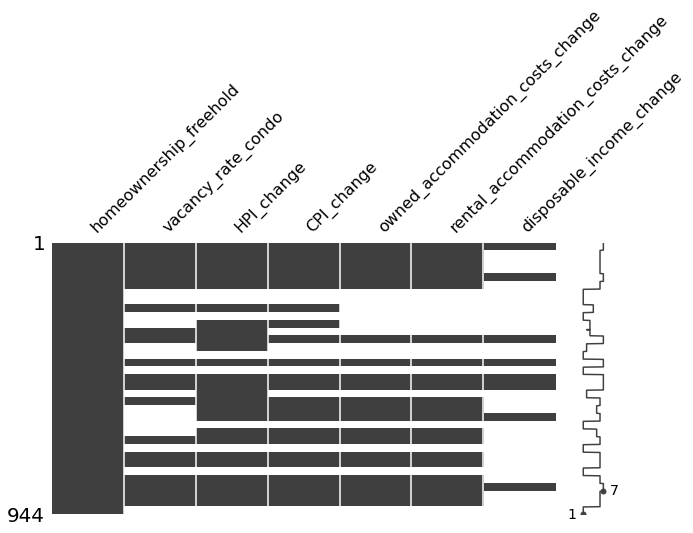

In [10]:
import matplotlib.pyplot as plt 

# Visual representation of columns with missing values
import missingno as mno
mno.matrix(housing_df[missing_columns], figsize = (10, 5))
plt.show()



In [11]:
# for col in missing_columns:
#     print("dataframe with NaN values in " + col)
#     display( housing_df[housing_df[col].isna()] )

## Imputing missing values by interpolating according to year

In [12]:
housing_df.interpolate(method='linear', limit_direction='forward', axis=0, inplace = True)

In [13]:
#housing_df.set_index('year').interpolate(method="linear", inplace = True)

In [14]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         944 non-null    int64  
 1   year                               944 non-null    float64
 2   total_dwelling                     944 non-null    int64  
 3   single_detached                    944 non-null    int64  
 4   multiple                           944 non-null    int64  
 5   semi_detached                      944 non-null    int64  
 6   row                                944 non-null    int64  
 7   apartment                          944 non-null    int64  
 8   total_dwelling_market              944 non-null    int64  
 9   homeownership_freehold             944 non-null    float64
 10  rental                             944 non-null    int64  
 11  homeownership_condo                944 non-null    int64  

In [15]:
# Sanity check for NaN values
percentage_missing(housing_df)

,percentage of missing values


In [16]:
# dropping column 1 which is just index
housing_df.drop(['Unnamed: 0'], axis=1, inplace= True)

In [17]:
housing_df.head()

,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,rental,...,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,disposable_income_change,migration,region
0,1990.0,3297,2847,450,57,6,387,2274,2004.0,142,...,418,524,608,1105.421,67.300,0.219444,7.4,-2.669133,-5108,manitoba
1,1991.0,1950,1589,361,14,0,347,1438,1085.0,143,...,424,531,630,1109.604,67.025,-1.364064,8.6,-2.669133,-5108,manitoba
2,1992.0,2310,1683,627,64,10,553,1821,1383.0,170,...,434,545,644,1112.689,66.475,-1.351685,9.3,-0.326989,-5108,manitoba
3,1993.0,2425,1874,551,52,83,416,1702,1338.0,151,...,435,550,652,1117.618,66.850,0.766782,9.3,-0.453243,-2520,manitoba
4,1994.0,3197,2441,756,72,410,274,1664,1289.0,79,...,440,551,645,1123.230,66.750,0.774181,8.8,0.161821,-1996,manitoba


# Analysis on Supply and Demand

In [18]:
# seperate dataframe for construction details


constn_df = housing_df.drop(housing_df.columns[24: -1], axis=1)

constn_df.columns

Index(['year', 'total_dwelling', 'single_detached', 'multiple',
       'semi_detached', 'row', 'apartment', 'total_dwelling_market',
       'homeownership_freehold', 'rental', 'homeownership_condo', 'other',
       'completed', 'res_building_permit', 'res_building_permit_amount',
       'completed_but_unabsorbed_homes', 'new_single_and_semi_detached',
       'new_rows_and_apartment', 'rental_vacancy_rate',
       'rental_avilability_rate', 'vacancy_rate_seniors', 'vacancy_rate_condo',
       'HPI_change', 'CPI_change', 'region'],
      dtype='object')

In [19]:
constn_df.rename(columns={'total_dwelling' :'total_constn_start', 
                          'total_dwelling_market' : 'contn_start_int_market',
                          'completed' : 'total_constn_complete', 
                         }, inplace = True)


In [20]:
constn_df.columns

Index(['year', 'total_constn_start', 'single_detached', 'multiple',
       'semi_detached', 'row', 'apartment', 'contn_start_int_market',
       'homeownership_freehold', 'rental', 'homeownership_condo', 'other',
       'total_constn_complete', 'res_building_permit',
       'res_building_permit_amount', 'completed_but_unabsorbed_homes',
       'new_single_and_semi_detached', 'new_rows_and_apartment',
       'rental_vacancy_rate', 'rental_avilability_rate',
       'vacancy_rate_seniors', 'vacancy_rate_condo', 'HPI_change',
       'CPI_change', 'region'],
      dtype='object')

In [21]:
fig = px.line(constn_df, x="year", y="total_constn_start", color = 'region', title='Constructions started year by year')
fig.show()

* The above chart shows that Ontario has highest number of constructions.
* In 1995, there was a considerable dip in new constructions. Then it increased and reached the peak in 2003.In 2009 there is little drop. Till 2016 the construction are steadily increasing.
* We can see the same trend in other provinces as well(Quebec, Alberta)

In [22]:
provinces = ['alberta', 'ontario', 'quebec','prince_edward', 'manitoba','new_brunswick', 'saskatchewan', 'nova_scotia' ]

In [23]:
# plotting bar chart for the provinces alone
fig = px.bar(constn_df[constn_df['region'].isin(provinces)], x="year", y = "total_constn_start", color = 'region',
             barmode='group',height=500, title='Constructions started year by year for Canadian Provinces')
fig.show()

* The figure above shows Ontario, Quebec and Alberta high construction rate compared to other provinces.
* The housing crisis in USA was in 2008, In 2009, number constructions decreased but again picked up in next year.
* In 1990, Ontario and Quebec had significatly higher number of constructions but after 2003, the numbers increased almost similar to Quebec


## More detailed comparion for Constructions Started vs Completed Vs Unabsorbed by year Vs Residential Permit for  Census Metropolitan Areas - Canada

In [24]:
# regions = housing_df["region"].unique().tolist()

In [25]:
# set with all the region in ascending order
regions = sorted(set(housing_df["region"]))

# Initialize figure, plots , buttons and default region to be displayed
fig1=go.Figure()
region_plot_names = []
buttons=[]
default_region = regions[0]

for region_name in regions:
    reg_df = constn_df[constn_df['region']== region_name]
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.total_constn_complete,  
                        mode='lines + markers', name='Construction Completed',
                            visible=(region_name==default_region)))
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.completed_but_unabsorbed_homes,
                            mode='lines+markers', name='Units unabsorbed',
                            visible=(region_name==default_region)))
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.res_building_permit,  
                        mode='lines+markers', name='residential building Permit',
                            visible=(region_name==default_region)))
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.total_constn_start,
                            mode='lines+markers', name='Construction Started',
                            visible=(region_name==default_region)))
    
    region_plot_names.extend([region_name]*4)
    
for region_name in regions:
    buttons.append(dict(method='update',
                        label=region_name,
                        args = [{'visible': [region_name==r for r in region_plot_names]}]))
    
# Add dropdown menus to the figure
fig1.update_layout(title = "Construction Started vs Completed Vs Unabsorbed by year Vs Residential Permit for  Census Metropolitan Areas - Canada",
                  yaxis_title = "number of dwelling units",
                  xaxis_title = "Year",
                  showlegend=True, 
                  updatemenus=[{"buttons": buttons, 
                                "direction": "down", 
                                "active": regions.index(default_region), 
                                "showactive": True, 
                                
                                "x": 0.5, 
                                "y": 1.15}
                              ])
fig1.show()
    

* In almost all the places, the unabsorbed homes are very low compared to the new homes constructed every year and residential building permit. This shows that demand is pretty high.

* In all regions there is a big drop in construction in 1995 and 2008
    - 1990 - 1992 was recession, the period of economic downturn affecting much of the Western world( Canada was affected more than US).
    - 2008 housing crisis in US, not that much influence in Canada, the construction started raising from 2010
 * Number of Constructions started, completed and building permits closely arround the same range. 
 * When comparing unabsorbed homes(construction finished but not sold yet) with the total number of completed units, unabsorbed homes are less.The unabsorbed units are very low, which shows the demand is very high

In [26]:
# provinces = ['alberta', 'ontario', 'quebec','prince_edward', 'manitoba','new_brunswick', 'saskatchewan', 'nova_scotia' ]

# Population growth vs Construction growth

In [27]:
housing_df.columns

Index(['year', 'total_dwelling', 'single_detached', 'multiple',
       'semi_detached', 'row', 'apartment', 'total_dwelling_market',
       'homeownership_freehold', 'rental', 'homeownership_condo', 'other',
       'completed', 'res_building_permit', 'res_building_permit_amount',
       'completed_but_unabsorbed_homes', 'new_single_and_semi_detached',
       'new_rows_and_apartment', 'rental_vacancy_rate',
       'rental_avilability_rate', 'vacancy_rate_seniors', 'vacancy_rate_condo',
       'HPI_change', 'CPI_change', 'owned_accommodation_costs_change',
       'rental_accommodation_costs_change', 'bachelor', 'one_bedroom',
       'two_bedroom', 'three_bedroom', 'population',
       'labour_participation_rate', 'employment_change', 'unemployment_rate',
       'disposable_income_change', 'migration', 'region'],
      dtype='object')

In [28]:
rate_df= housing_df[ ['year','completed', 'rental_vacancy_rate', 'rental_avilability_rate', 'vacancy_rate_seniors', 'vacancy_rate_condo',
       'HPI_change', 'CPI_change', 'owned_accommodation_costs_change','rental_accommodation_costs_change', 'migration','population', 'region'] ]

In [29]:
rate_change_df = rate_df.copy()
#completed_percent = rate_change_df.loc[:, ('completed')].pct_change()
#df = df.sort_values(['Item', 'Year']).reset_index(drop=True)
rate_change_df.sort_values('year').reset_index(drop=True)
construction_percent = rate_change_df.groupby('region', sort=False)['completed'].apply(
                                    lambda x: x.pct_change())
popn_percent = rate_change_df.groupby('region', sort=False)['population'].apply(
                                    lambda x: x.pct_change())
migration_percent = rate_change_df.groupby('region', sort=False)['migration'].apply(
                                    lambda x: x.pct_change())
#new_percent = (rate_change_df.groupby('region')['completed'].apply(pd.Series.pct_change) )



In [30]:
rate_change_df.loc[:,'construction_compn_rate'] = construction_percent 
rate_change_df.loc[:,'popn_rate'] = popn_percent 
rate_change_df.loc[:,'migration_rate'] = migration_percent 
# rate_change_df.loc[:,'new_construction_compn_rate'] = new_percent 
#.to_numpy()

In [31]:
rate_change_df[rate_change_df['region'] == 'ontario']

,year,completed,rental_vacancy_rate,rental_avilability_rate,vacancy_rate_seniors,vacancy_rate_condo,HPI_change,CPI_change,owned_accommodation_costs_change,rental_accommodation_costs_change,migration,population,region,construction_compn_rate,popn_rate,migration_rate
836,1990.0,80562,1.4,5.7,13.3,-1.329857,4.815267,1.483051,6.632902,3.985029,74516,10295.832,ontario,NaN,NaN,NaN
837,1991.0,59622,2.2,5.7,13.3,-10.702960,4.636393,1.483051,2.109974,3.419437,74516,10431.316,ontario,-0.259924,0.013159,0.000000
838,1992.0,63134,2.6,5.7,13.3,-3.211009,1.021750,1.483051,-0.429377,2.917392,74516,10572.205,ontario,0.058904,0.013506,0.000000
839,1993.0,51130,2.7,5.7,13.3,-1.712276,1.782495,1.483051,-0.835504,2.586035,55780,10690.038,ontario,-0.190135,0.011146,-0.251436
840,1994.0,49106,2.4,5.7,13.3,-0.279981,0.049193,1.483051,-1.386121,2.094241,71311,10819.146,ontario,-0.039585,0.012077,0.278433
841,1995.0,36278,2.3,5.7,13.3,-0.015598,2.468286,1.483051,1.460726,1.737892,73939,10950.119,ontario,-0.261231,0.012106,0.036853
842,1996.0,40729,3.0,5.7,13.3,-1.014041,1.516315,1.483051,-0.833032,1.437506,78225,11082.903,ontario,0.122691,0.012126,0.057967
843,1997.0,51297,2.8,5.7,13.3,2.080378,1.881263,1.483051,-0.776114,1.490752,91092,11227.651,ontario,0.259471,0.013060,0.164487
844,1998.0,48403,2.6,5.7,13.3,2.501158,0.927902,1.483051,0.395693,1.260314,87411,11365.901,ontario,-0.056417,0.012313,-0.040410
845,1999.0,59835,2.1,5.7,13.3,1.656876,1.939873,1.798961,1.420715,1.280444,90589,11504.759,ontario,0.236184,0.012217,0.036357


In [32]:
# rate_change_df.drop(['completed', 'population', 'migration'], axis = 1)

In [33]:
# rate_change_df = pd.DataFrame( data, columns=['prod_desc','activity_month','prod_count'] )
 
# product_df['pct_ch'] = product_df.groupby('prod_desc')['prod_count'].pct_change() + 1


In [34]:
# set with all the region in ascending order
regions = sorted(set(rate_change_df["region"]))

# Initialize figure, plots , buttons and default region to be displayed
fig1=go.Figure()
region_plot_names = []
buttons=[]
default_region = regions[0]

for region_name in regions:
    reg_df = rate_change_df[rate_change_df['region']== region_name]
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.construction_compn_rate,  
                        mode='lines + markers', name='Rate of Construction Completed',
                            visible=(region_name==default_region)))
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.popn_rate,
                            mode='lines+markers', name='Population growth rate',
                            visible=(region_name==default_region)))
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.migration_rate,  
                        mode='lines+markers', name='Immigration rate',
                            visible=(region_name==default_region)))
    
#     fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.HPI_change,
#                             mode='lines+markers', name='HPI rate',
#                             visible=(region_name==default_region)))
    
    region_plot_names.extend([region_name]*3)
    
for region_name in regions:
    buttons.append(dict(method='update',
                        label=region_name,
                        args = [{'visible': [region_name==r for r in region_plot_names]}]))
    
# Add dropdown menus to the figure
fig1.update_layout(title = "Pecentage of Construction, Population and Immigration  for  Census Metropolitan Areas - Canada",
                  yaxis_title = "Percentage change",
                  xaxis_title = "Year",
                  showlegend=True, 
                  updatemenus=[{"buttons": buttons, 
                                "direction": "down", 
                                "active": regions.index(default_region), 
                                "showactive": True, 
                                
                                "x": 0.5, 
                                "y": 1.15}
                              ])
fig1.show()
    

The graph above is not a good comparison. 


## Population vs total construction

In [35]:
# set with all the region in ascending order
regions = sorted(set(housing_df["region"]))

# Initialize figure, plots , buttons and default region to be displayed
fig1=go.Figure()
region_plot_names = []
buttons=[]
default_region = regions[0]

for region_name in regions:
    reg_df = rate_change_df[housing_df['region']== region_name]
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.population*1000,  
                        mode='lines + markers', name='Population ',
                            visible=(region_name==default_region)))
    
    fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.migration,
                            mode='lines+markers', name='Migration',
                            visible=(region_name==default_region)))
    
#     fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.migration_rate,  
#                         mode='lines+markers', name='Immigration rate',
#                             visible=(region_name==default_region)))
    
#     fig1.add_trace(go.Scatter(x=reg_df.year, y=reg_df.HPI_change,
#                             mode='lines+markers', name='HPI rate',
#                             visible=(region_name==default_region)))
    
    region_plot_names.extend([region_name]*2)
    
for region_name in regions:
    buttons.append(dict(method='update',
                        label=region_name,
                        args = [{'visible': [region_name==r for r in region_plot_names]}]))
    
# Add dropdown menus to the figure
fig1.update_layout(title = "Construction Vs Population for  Census Metropolitan Areas - Canada",
                  yaxis_title = "Count",
                  xaxis_title = "Year",
                  showlegend=True, 
                  updatemenus=[{"buttons": buttons, 
                                "direction": "down", 
                                "active": regions.index(default_region), 
                                "showactive": True, 
                                
                                "x": 0.5, 
                                "y": 1.15}
                              ])
fig1.show()
    

### Plotting Correlation matrix for Ontario, Quebec and Alberta(top 3 provinces)

In [36]:

corr_mat = constn_df[ constn_df['region'] == 'ontario'].corr()
fig = px.imshow(round(corr_mat,2), text_auto=True, height = 1000, width = 1000, title = "Correlation of construction data in Ontario")

fig.show()

In [37]:
corr_mat['HPI_change'].sort_values(ascending = False)

HPI_change                        1.000000
rental                            0.373897
total_constn_complete             0.321521
new_rows_and_apartment            0.280478
completed_but_unabsorbed_homes    0.262401
other                             0.188292
vacancy_rate_seniors              0.178510
total_constn_start                0.170503
single_detached                   0.157303
res_building_permit               0.137602
row                               0.128409
contn_start_int_market            0.115555
multiple                          0.100474
rental_avilability_rate           0.086777
apartment                         0.078014
homeownership_freehold            0.035187
semi_detached                     0.030936
new_single_and_semi_detached      0.021902
homeownership_condo              -0.035208
res_building_permit_amount       -0.110740
CPI_change                       -0.177747
year                             -0.262496
vacancy_rate_condo               -0.277473
rental_vaca

In [38]:
corr_mat = constn_df[ constn_df['region'] == 'quebec'].corr()
fig = px.imshow(round(corr_mat,2), text_auto=True, height = 1000, width = 1000, title = "Correlation of construction data in Quebec")

fig.show()

In [39]:
corr_mat['HPI_change'].sort_values(ascending = False)

HPI_change                        1.000000
homeownership_freehold            0.431217
single_detached                   0.382924
new_single_and_semi_detached      0.285385
total_constn_start                0.234556
contn_start_int_market            0.226000
total_constn_complete             0.216882
rental                            0.211321
vacancy_rate_condo                0.184699
res_building_permit               0.177530
semi_detached                     0.131060
completed_but_unabsorbed_homes    0.093555
vacancy_rate_seniors              0.089712
multiple                          0.066237
apartment                         0.056143
rental_vacancy_rate               0.050898
other                            -0.006227
row                              -0.009738
new_rows_and_apartment           -0.037508
res_building_permit_amount       -0.086344
homeownership_condo              -0.098712
CPI_change                       -0.179457
rental_avilability_rate          -0.285947
year       

In [40]:
corr_mat = constn_df[ constn_df['region'] == 'alberta'].corr()
fig = px.imshow(round(corr_mat,2), text_auto=True, height = 1000, width = 1000, title = "Correlation of construction data in Alberta")

fig.show()

In [41]:
corr_mat['HPI_change'].sort_values(ascending = False)

HPI_change                        1.000000
single_detached                   0.729940
total_constn_start                0.582874
homeownership_freehold            0.577454
res_building_permit               0.558247
contn_start_int_market            0.502828
CPI_change                        0.498487
homeownership_condo               0.449898
total_constn_complete             0.360187
apartment                         0.355150
multiple                          0.330196
semi_detached                     0.257920
row                               0.247250
res_building_permit_amount        0.223841
other                             0.167729
rental                           -0.027930
year                             -0.038902
vacancy_rate_condo               -0.038902
new_single_and_semi_detached     -0.079697
vacancy_rate_seniors             -0.223261
completed_but_unabsorbed_homes   -0.395966
rental_vacancy_rate              -0.468774
new_rows_and_apartment           -0.513146
rental_avil

rental ,total_constn_complete,total_constn_start, completed_but_unabsorbed_homes has pretty good correlation with HPI

In [42]:
# Code taken from Ankit's notebook
#converting years into integer
# df_master = housing_df.copy()

from datetime import datetime


housing_df = housing_df[housing_df['year'] != 1993.1].astype({'year': int})

#converting year into datetime
housing_df['year'] = housing_df['year'].transform(lambda x : datetime.strptime(str(x), '%Y'))

housing_df.year.unique()

array(['1990-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
       '1992-01-01T00:00:00.000000000', '1993-01-01T00:00:00.000000000',
       '1994-01-01T00:00:00.000000000', '1995-01-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000'], dtype='dat

In [43]:
# Code taken from Ankit's notebook
import plotly.express as px
import plotly.graph_objects as go

fig = px.bar(housing_df, x = housing_df['year'])
buttonlist1 = []

for col in housing_df.columns:
    buttonlist1.append(
        dict(
        args = ['y', [housing_df[str(col)]]],
        label = str(col),
        method ='restyle'
        ))

fig.update_layout(
        title = "Housing features by year",
        yaxis_title = "value",
        xaxis_title = "Year",
        updatemenus = [
            go.layout.Updatemenu(
            buttons = buttonlist1,
            direction = "down",
            pad = {"r":10, "t":10},
            showactive = True,
            x = 0.1,
            xanchor = "left",
            y = 1.1,
            yanchor = "top"
            )
        ],
    autosize = True
)



The total dwelling market - “intended market” is the tenure (own or rent) in which the unit is being offered. 

--

Changing the column name just for my understanding


In [44]:
# 'single_detached': 'detached_start',
#                           'multiple'       : 'multiple_start',
#                           'semi_detached'  : 'semi_start', 
#                           'row'            : 'row_start'
#                           'apartment'      : 'appartment_start'

In [45]:
# constn_df.head()

# Reference:
1. https://eppdscrmssa01.blob.core.windows.net/cmhcprodcontainer/sf/project/archive/housing_markets/housinginformationmonthly/61504_2019_m10.pdf

2. Survey methodologies by CMHC - https://www.cmhc-schl.gc.ca/en/professionals/housing-markets-data-and-research/housing-research/surveys/methods/methodologies-starts-completions-market-absorption-survey

3. https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/

4. https://github.com/OmdenaAI/philadelphia-climate-change-buildings/blob/main/src/tasks/task-2-EDA/task-2-EDA.ipynb

5. https://www.kaggle.com/code/benhamner/python-plotly-dropdown-demo/notebook